## We import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config IPCompleter.greedy=True
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import sklearn
from sklearn_pandas import DataFrameMapper
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelBinarizer
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, confusion_matrix, accuracy_score
from yellowbrick.features.importances import FeatureImportances
import os

# a) Import the dataset and clean the data of any anomalies.
## We create a working directory and import the file

In [2]:
os.chdir("/Busara_Data_Task_April_2019")
os.listdir('.')

['Data Task Instructions.pdf', 'HealthInsurance.xlsx', 'School data.xlsx']

In [3]:
health = pd.ExcelFile('HealthInsurance.xlsx')
health.sheet_names #view the sheets

['Sheet 1']

In [4]:
# create a dataframe from the sheet
df= health.parse('Sheet 1')
df.head()

,pid,self-reported health status,age in years,Is there any hindrace to receiving medical attention,gender of the respondent,Do you have health insurance?,Are you married?,Are you self employed?,house hold size,region of residence,respondent's ethnicity,highest level of education
0,PO1,YES,31,no,male,yes,yes,yes,4,south,zulu,bachelor
1,PO2,YES,31,no,Female,yes,yes,no,4,south,zulu,highschool
2,PO3,YES,54,no,male,yes,yes,no,5,west,zulu,adult education high school
3,PO4,YES,27,no,male,yes,no,no,5,west,zulu,highschool
4,PO5,YES,39,no,male,yes,yes,no,5,west,zulu,none


In [5]:
print("The dataframe has got {} rows and {} columns.".format(df.shape[0], df.shape[1]))

The dataframe has got 8802 rows and 12 columns.


In [6]:
df['pid'].nunique()

8802

## Check for null 

In [7]:
df.isnull().sum()

pid                                                     0
self-reported health status                             0
age in years                                            0
Is there any hindrace to receiving medical attention    0
gender of the respondent                                0
Do you have health insurance?                           0
Are you married?                                        0
Are you self employed?                                  0
house hold size                                         0
region of residence                                     0
respondent's ethnicity                                  0
highest level of education                              0
dtype: int64

In [8]:
# List the columns
df.columns.tolist()

['pid',
 'self-reported health status',
 'age in years',
 'Is there any hindrace to receiving medical attention',
 'gender of the respondent',
 'Do you have health insurance?',
 'Are you married?',
 'Are you self employed?',
 'house hold size',
 'region of residence',
 "respondent's ethnicity",
 'highest level of education']

## Check distribution of values per column

In [8]:
# Distribution of values in 'self-reported health status' column
df['self-reported health status'].value_counts()
# This needs cleaning to merge yes with YES, y and no with N

yes    8124
no      588
N        41
YES      31
Y        18
Name: self-reported health status, dtype: int64

In [10]:
# we create a new column to where we 
df['self_reported_h_status'] = np.where(np.logical_or(df['self-reported health status']=='no', df['self-reported health status']=='N'), 'NO','YES')
df['self_reported_h_status'].value_counts()

YES    8173
NO      629
Name: self_reported_h_status, dtype: int64

In [9]:
# age summary statistics
df['age in years'].describe()

count    8802.000000
mean       38.936833
std        11.110823
min        18.000000
25%        30.000000
50%        39.000000
75%        48.000000
max        62.000000
Name: age in years, dtype: float64

In [10]:
df['Is there any hindrace to receiving medical attention'].value_counts()

no     7571
yes    1231
Name: Is there any hindrace to receiving medical attention, dtype: int64

In [13]:
# Distribution of items across gender
df['gender of the respondent'].value_counts()
# Needs cleaning to merge female, F and Female

male      4633
female    4078
F           69
Female      22
Name: gender of the respondent, dtype: int64

In [11]:
# we create a new column called gender to correct the above
df['gender'] = np.where(df['gender of the respondent']=='male', 'MALE', 'FEMALE' )
df.gender.value_counts()

MALE      4633
FEMALE    4169
Name: gender, dtype: int64

In [12]:
# Distribution of values in 'Do you have health insurance?' column
df['Do you have health insurance?'].value_counts()

yes    7052
no     1750
Name: Do you have health insurance?, dtype: int64

In [13]:
# Distribution of values in 'Are you married?' column
df['Are you married?'].value_counts()

yes    5433
no     3369
Name: Are you married?, dtype: int64

In [14]:
# Distribution across 'Are you self employed?' column
df['Are you self employed?'].value_counts()

no     7731
yes    1071
Name: Are you self employed?, dtype: int64

In [15]:
# 'house hold size' summary stats
df['house hold size'].describe()

count    8802.000000
mean        3.093501
std         1.559633
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        14.000000
Name: house hold size, dtype: float64

In [16]:
# Distribution of values in 'region of residence' column
df['region of residence'].value_counts()

south        3075
midwest      2023
west         2022
northeast    1682
Name: region of residence, dtype: int64

In [17]:
# Distribution of values in "respondent's ethnicity" column
df["respondent's ethnicity"].value_counts()

zulu        7354
Ndembele    1083
other        365
Name: respondent's ethnicity, dtype: int64

In [21]:
# Distribution of values in 'highest level of education'
df['highest level of education'].value_counts()

highschool                     4410
bachelor                       1549
none                           1119
other                           667
master                          524
adult education high school     374
phd                             135
high-school                      24
Name: highest level of education, dtype: int64

# b) What is the distribution of the sample in terms of (i) gender and (ii) age?

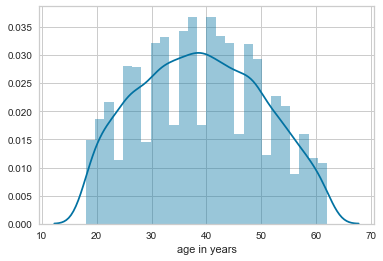

In [7]:
sns.distplot(df['age in years'])

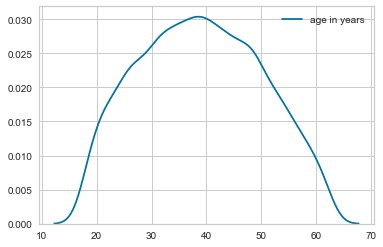

In [6]:

sns.kdeplot(df['age in years'])

In [23]:
# Age follows a normal distribution 

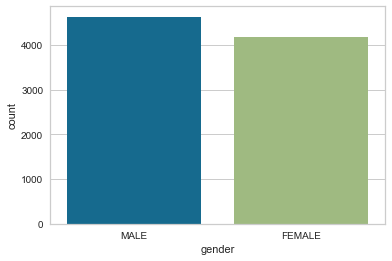

In [24]:
sns.countplot(df['gender'])

# c) Ideally, we expect respondents with poor health status to have health insurance. Is this the case according to this data? Using an appropriate statistical test, investigate the relationship between the two variables. Specify the hypothesis being tested here.

## Null hypothesis being tested is poor health status significantly influences health insurance cover uptake.
## we compute the Pearson correlation coefficient. The Pearson correlation coefficient is one of the most common methods to quantify correlation between variables, and by convention, the following thresholds are usually used:

### 0.2 = weak
### 0.5 = medium
### 0.8 = strong
### 0.9 = very strong

In [64]:
df['health_status']=np.where(df['self_reported_h_status']=='YES', 1, 0)
#We assume 1 for poor health status and 0 for otherwise
df['insurance_cover'] = np.where(df['Do you have health insurance?']=='yes',1,0)
df['health_status'].corr(df['insurance_cover'])

0.0507704844108623

##  Poor health status is weakly correlated to Insurance cover uptake with a pearseon correlation of 0.05
## Null hypothesis is False

# d) Determine the ethnicity of majority of the respondents. Filter respondents for the major ethnicity and count of respondents who are self-employed and have a health insurance cover.

In [26]:
df["respondent's ethnicity"].value_counts()

zulu        7354
Ndembele    1083
other        365
Name: respondent's ethnicity, dtype: int64

In [27]:
print('Majority ethnicity is zulu with {}'.format(df["respondent's ethnicity"].value_counts()[0]))

Majority ethnicity is zulu with 7354


In [28]:
# We filter df for zulu ethnicity
zulu = df[df["respondent's ethnicity"]=='zulu']

In [29]:
# Distribution of values in 'Are you self employed?' column
zulu['Are you self employed?'].value_counts()

no     6403
yes     951
Name: Are you self employed?, dtype: int64

In [30]:
# Distribution of value in 'Do you have health insurance?' column
zulu['Do you have health insurance?'].value_counts()

yes    5953
no     1401
Name: Do you have health insurance?, dtype: int64

In [31]:
# filter zulu ethnicity who are self employed and have insurance cover
print('The total number of respondents of zulu ethnicity who are employed and have an insurance cover is {}.'.format(len(zulu.loc[(zulu['Are you self employed?']=='yes') & (zulu['Do you have health insurance?']=='yes')])))

The total number of respondents of zulu ethnicity who are employed and have an insurance cover is 671.


# e) An insurance company would like to use this data to understand what factors drive insurance uptake. Select an appropriate statistical model for this task and give reasons for the choice.

## We choose our target variable and features variables.
## Our target variable will be 'Do you have health insurance?' column which is contains yes or no values.
## Representing the values as 1 for yes and 0 for 0 leads to binary classification model.

In [62]:
df['insurance_cover'].value_counts()

1    7052
0    1750
Name: insurance_cover, dtype: int64

In [33]:
features = ['self_reported_h_status',
 'Is there any hindrace to receiving medical attention',
 'Are you married?',
 'Are you self employed?',
 'region of residence',
 "respondent's ethnicity",
 'age in years',
 'house hold size',
 'highest level of education',
 'gender']
target = 'insurance_cover'

In [68]:
clean_data = df[features+[target]]
clean_data.head()

,self_reported_h_status,Is there any hindrace to receiving medical attention,Are you married?,Are you self employed?,region of residence,respondent's ethnicity,age in years,house hold size,highest level of education,gender,insurance_cover
0,YES,no,yes,yes,south,zulu,31,4,bachelor,MALE,1
1,YES,no,yes,no,south,zulu,31,4,highschool,FEMALE,1
2,YES,no,yes,no,west,zulu,54,5,adult education high school,MALE,1
3,YES,no,no,no,west,zulu,27,5,highschool,MALE,1
4,YES,no,yes,no,west,zulu,39,5,none,MALE,1


In [35]:
categorical_cols = [
 'self-reported health status',
 'Is there any hindrace to receiving medical attention',
 'Do you have health insurance?',
 'Are you married?',
 'Are you self employed?',
 'region of residence',
 "respondent's ethnicity",
 'highest level of education',
 'gender']
numerical_cols = ['age in years', 'house hold size']

In [36]:
mapper = DataFrameMapper([
('self_reported_h_status',sklearn.preprocessing.LabelBinarizer()),
('Is there any hindrace to receiving medical attention', sklearn.preprocessing.LabelBinarizer()),
('Are you married?',sklearn.preprocessing.LabelBinarizer()),
('Are you self employed?', sklearn.preprocessing.LabelBinarizer()),
('region of residence', sklearn.preprocessing.LabelBinarizer()),
("respondent's ethnicity",sklearn.preprocessing.LabelBinarizer()),
('highest level of education', sklearn.preprocessing.LabelBinarizer()),
('gender', sklearn.preprocessing.LabelBinarizer()),
 ])

X1=mapper.fit_transform(clean_data)
X2=np.array(clean_data[numerical_cols])
X = np.hstack((X1,X2)) #Combines X1 and X2 side by side, i.e. stacks them horizontally
y=np.array(clean_data['insurance_cover'])

In [37]:
# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100, stratify=y)

# Fit a Logistic regression

In [38]:
log_lm = LogisticRegression()
log_lm.fit(X_train, y_train)
y_pred = log_lm.predict(X_test)
log_lm.score(X_test, y_test)

0.8110154905335628

In [39]:
log_lm.coef_

array([[ 0.21786278, -0.03898928,  0.88728509, -1.20130013,  0.29855977,
         0.20385683, -0.09817383, -0.15837807,  0.11976904, -0.13433073,
         0.2604264 , -0.72391967,  0.38213939,  0.41060447, -0.1616951 ,
         0.56272933, -1.48964944,  0.14927436,  1.11638138, -0.25839105,
         0.02784069, -0.07583595]])

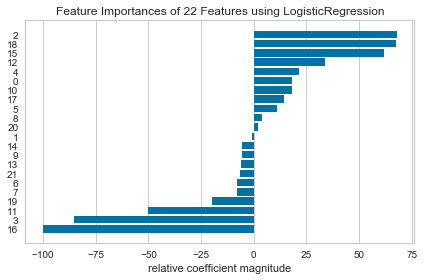

In [46]:
# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()
viz = FeatureImportances(log_lm, ax=ax)
viz.fit(X, y)
viz.poof()

#  Fit a GradientBoosting Classifier model

In [40]:
grd = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=1)
grd.fit(X_train, y_train)
grd.score(X_test, y_test)

0.8110154905335628

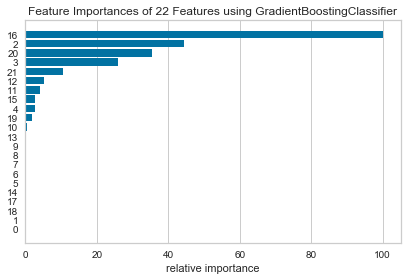

In [47]:
# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()
viz = FeatureImportances(grd, ax=ax)
viz.fit(X, y)
viz.poof()

## Fit a Random Tree model

In [55]:
rf=RandomForestClassifier()
parameters = {'max_depth':[5, 15], 'n_estimators':[10,30]}
rf_gs = GridSearchCV(rf, parameters)
rf_gs.fit(X_train, y_train)
print(rf_gs.score(X_test, y_test))

0.8068846815834768


### Given enough time, I would have fine tuned the parameters of the models to improve the model accuracy score.

# f) Fit the model on the data and construct 95-percent confidence intervals for the coefficients of the explanatory variables. What conclusions can you draw from these results? Present regression output in the most professional way and add any notes you think are necessary to explain the model specifications and output.

In [59]:
# Fit a Logistic regression
log_lm = LogisticRegression()
log_lm.fit(X_train, y_train)
y_pred = log_lm.predict(X_test)
log_lm.score(X_test, y_test)

0.8110154905335628

# g) Use a likelihood-ratio test to test the null hypothesis that none of the explanatory variables influences insurance uptake.

### Mixed linear regressions are used to fit the models. The llf attribute is generated for each model—this is the log likelihood statistic. The likelihood ratio test then compares the log likelihood values and tests whether the alternative model is significantly different to the null model. 

In [79]:
clean_data['age'] = clean_data['age in years']
clean_data['household_size'] = clean_data['house hold size']

In [81]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
stats.chisqprob = lambda chisq, df: stats.chi2.sf(chisq, df)


def lrtest(llmin, llmax):
    lr = 2 * (llmax - llmin)
    p = stats.chisqprob(lr, 1) # llmax has 1 dof more than llmin
    return lr, p
# fit age only to insurance_cover
md = smf.mixedlm("insurance_cover ~ age", clean_data, groups=clean_data["region of residence"])
mdf = md.fit(reml=False)
print(mdf.summary())
llf = mdf.llf

#Fit age and house_hold_size to insurance_cover
mdlitter = smf.mixedlm("insurance_cover ~ age + household_size", clean_data, groups=clean_data["region of residence"])
mdflitter = mdlitter.fit(reml=False)
print(mdflitter.summary())
llflitter = mdflitter.llf

lr, p = lrtest(llf, llflitter)
print('LR test, p value: {:.2f}, {:.4f}'.format(lr, p))

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: insurance_cover
No. Observations: 8802    Method:             ML             
No. Groups:       4       Scale:              0.1543         
Min. group size:  1682    Likelihood:         -4271.7898     
Max. group size:  3075    Converged:          Yes            
Mean group size:  2200.5                                     
---------------------------------------------------------------
            Coef.   Std.Err.     z      P>|z|   [0.025   0.975]
---------------------------------------------------------------
Intercept   0.596      0.024   24.707   0.000    0.549    0.643
age         0.005      0.000   14.241   0.000    0.005    0.006
Group Var   0.001      0.003                                   

            Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: insurance_cover
No. Observations: 8802    Method:             ML             
No. Groups:       4

## Since the likelihood ratio test was statistically significant with p-value equal to 0, age and household_size does influence health insurance uptake, so we reject the null hypothesis that none of the explanatory variables influences insurance uptake.